In [75]:
import pandas as pd
import numpy as np
# import statsmodels
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [12]:
# Importing dataset
df = pd.read_csv("insurance.csv")

In [35]:
# printing the shape - rows & columns
df.shape

(1338, 7)

In [36]:
# printing first 5 rows of dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [14]:
# Print the more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
# printing all unique values in categorical variables
a = df['sex'].unique()
b = df['children'].unique()
c = df['smoker'].unique()
d = df['region'].unique()
print(a,'\n',b,'\n',c,'\n',d)

['female' 'male'] 
 [0 1 3 2 5 4] 
 ['yes' 'no'] 
 ['southwest' 'southeast' 'northwest' 'northeast']


In [38]:
# checking for duplicate rows present
df.duplicated().sum()

1

In [39]:
# removing duplicate rows
df = df.drop_duplicates()

In [15]:
# Let us see statistical information about the Numerical features
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [16]:
# Let us see more statiscal information of the categorical features 
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "expenses" and other columns.



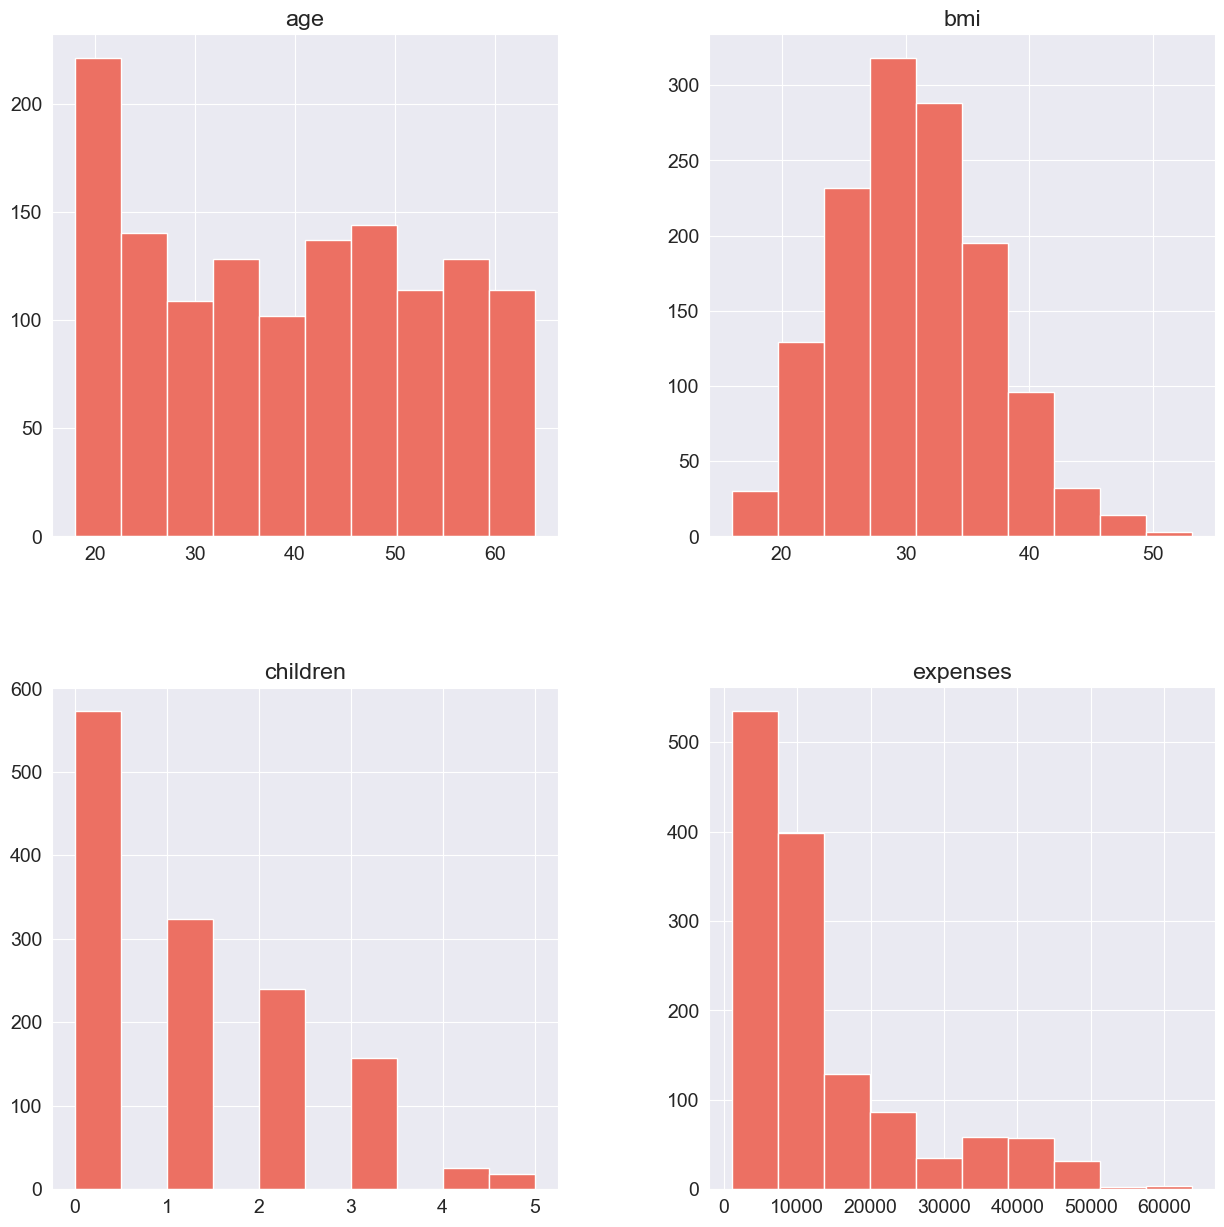

In [40]:
# plotting frequecy distribution for different variables
hist = df.hist(figsize = (15,15),color='#EC7063')

- More than 200 people are around 20 years of age.
- A large no. of people have bmi value between 25-35.
- Most people have single children only.
- Expenses value mostly lies below 15000.

<Axes: >

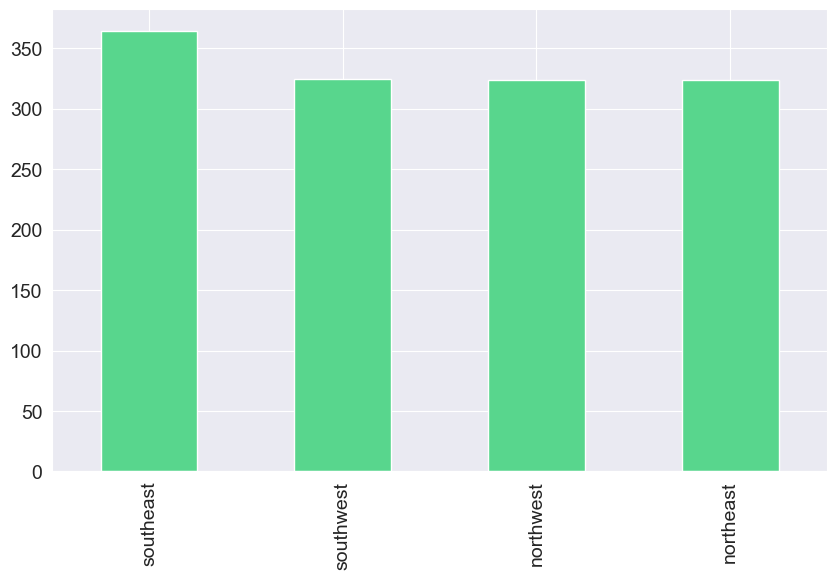

In [41]:
# frequecny distribution of each value present in 'region' variable
df.region.value_counts().plot(kind="bar",color='#58D68D')

- Value counts for different regions is almost equal

<Axes: ylabel='smoker'>

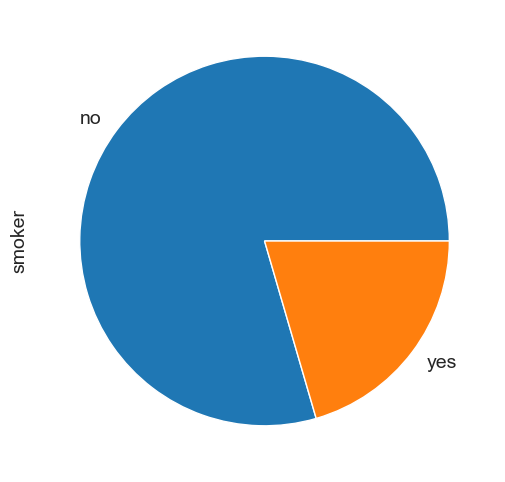

In [42]:
# pie-chart to plot frequency of smokers and non-smokers
df.smoker.value_counts().plot(kind="pie")

- A very large no. of people are non-smokers

In [43]:
# mean expenses for smokers and non-smokers
df.groupby('smoker').expenses.agg(["mean"])

,mean
smoker,
no,8440.660461
yes,32050.231971


- Being a smoker costs much more insurance premium . 

In [44]:
# mean expenses both male & female
df.groupby('sex').expenses.agg(["mean"])

,mean
sex,
female,12569.578897
male,13974.999111


- Not much difference between premiums of male and female

In [45]:
# find corelation between numerical variables
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


- Variables 'age' and 'bmi' have a strong corelation with expenses

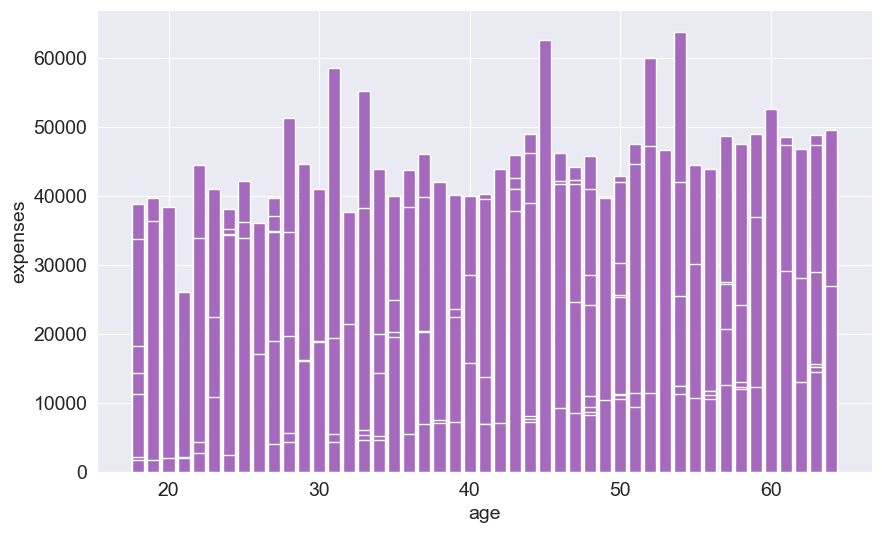

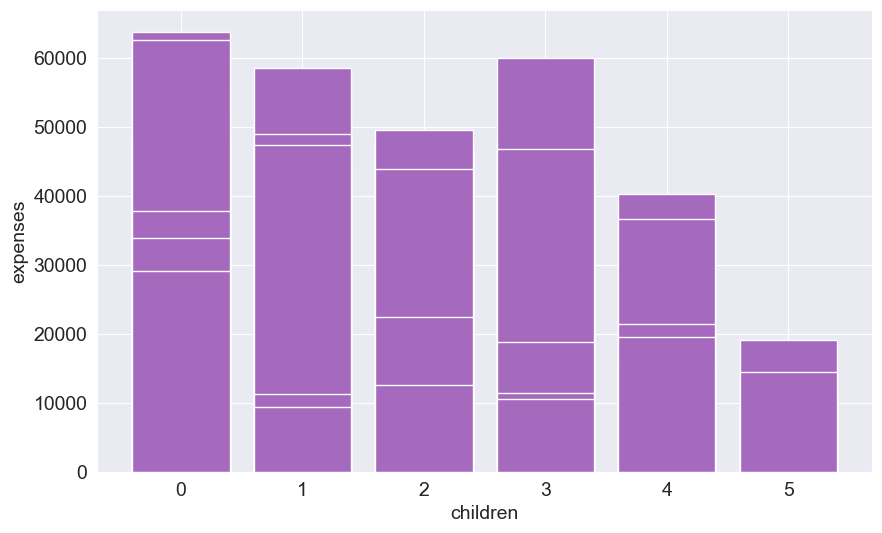

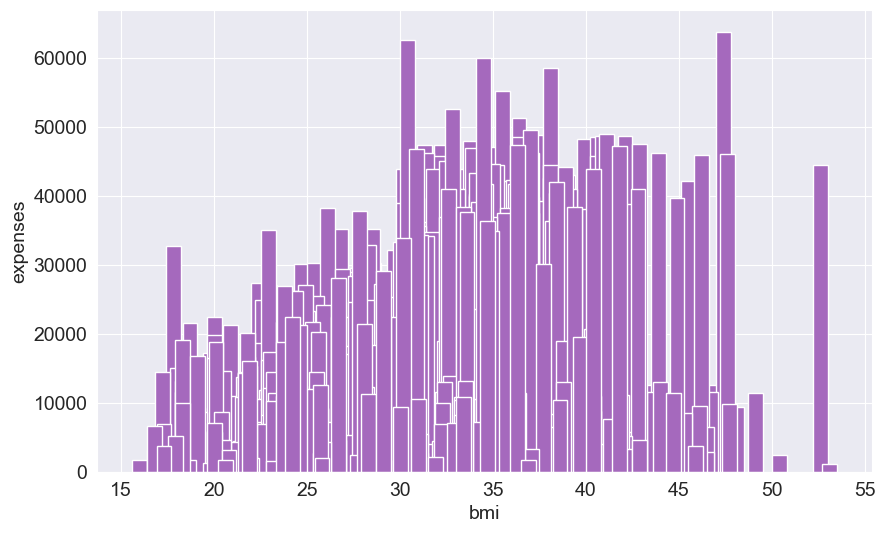

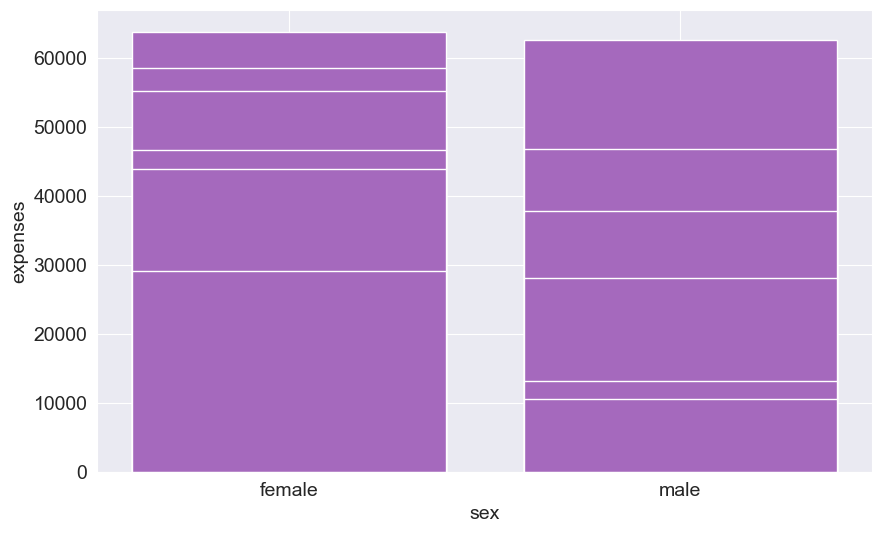

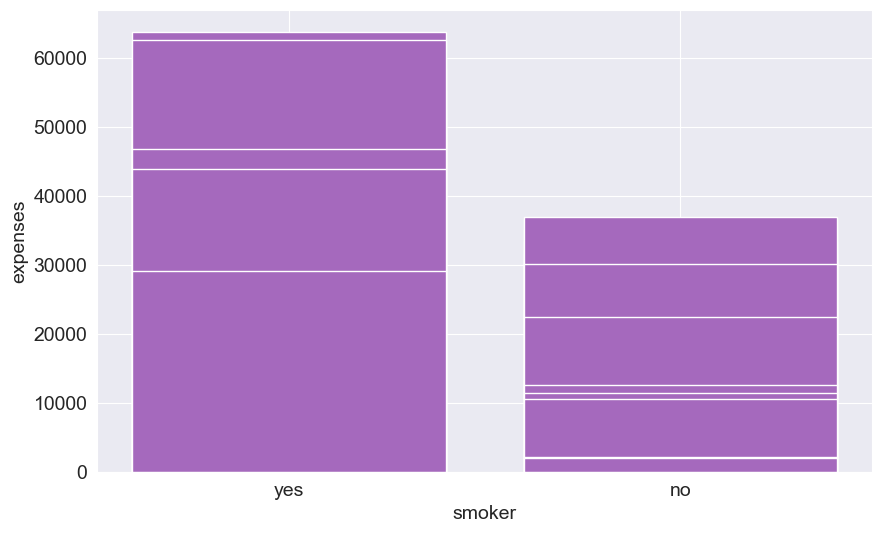

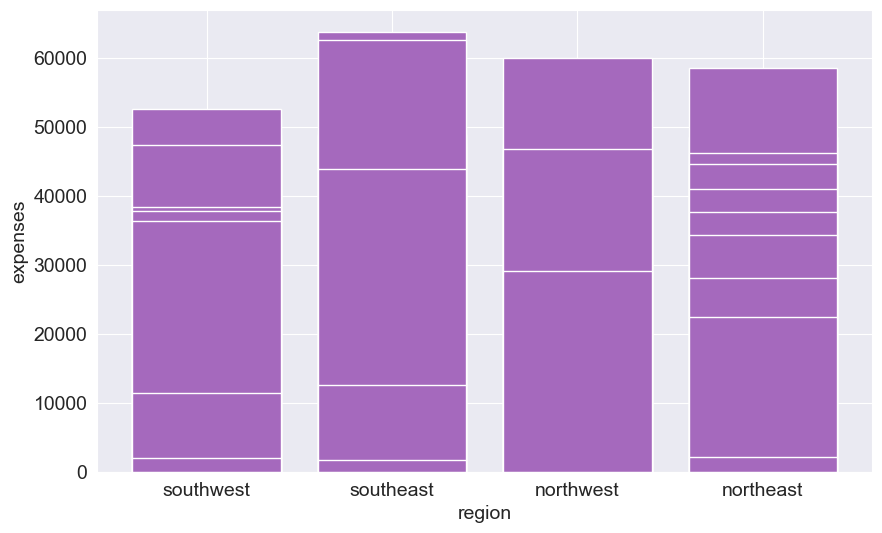

In [77]:
# bar graphs to show trends in 'expenses' variable w.r.t other variables present
a = ['age','children','bmi','sex','smoker','region']
for i in a:
    x = df[i]
    y = df['expenses']
    plt.bar(x,y,color='#A569BD')
    plt.xlabel(i)
    plt.ylabel('expenses')
    plt.show()


- Increase in age causes a slight increase in expenses.
- Expenses decreases as no. of children increases.
- As BMI value for a person increases, Expenses also get increase.
- Sex of people doesn't really affect the expenses
- Smokers pay way more than non-smokers.
- No observed trend in expenses with region.

Text(0.5, 1.0, 'Correlation Matrix')

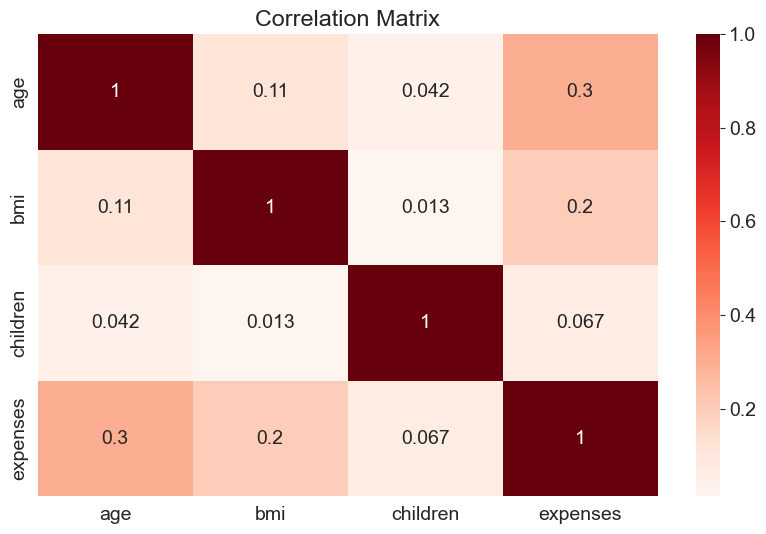

In [48]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

**Correlation vs causation** - It's important to understand that high correlation does not necessarily imply a cause-and-effect relationship between features, as there may be several other explanations. For example, features X and Y may be correlated if X causes Y, or if Y causes X, or if both are influenced independently by another factor Z. However, if one of the cause-and-effect relationships is disrupted, the correlation may no longer hold true. Additionally, the correlation between X and Y could be a result of a small sample size, rather than an actual relationship. Therefore, it's crucial to be cautious when interpreting correlations as causal relationships.

**Intrpretation of Correlation Values** - Correlation coefficients measure the strength and direction of the relationship between two variables. The correlation coefficient ranges from -1 to +1. A value of 1 indicates a perfect positive correlation, which means that as one variable increases, the other variable also increases. A value of -1 indicates a perfect negative correlation, which means that as one variable increases, the other variable decreases.

A value of 0 indicates no correlation, which means that there is no relationship between the two variables. Correlation coefficients between 0 and 1 (or between 0 and -1) indicate a weaker positive (or negative) correlation, where the strength of the relationship increases as the coefficient approaches 1 (or -1).

We found that some columns have a stronger connection with the "expenses" column than others. For instance, "age" and "expenses" increase together, while "bmi" and "expenses" don't. To measure this relationship, we can use a concept called the "correlation coefficient," which calculates how much two things are related to each other. You can find this value by using the .corr method in Pandas.

In [50]:
df.expenses.corr(df.age)

0.2983082112316943

In [51]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

0.7872343667298233

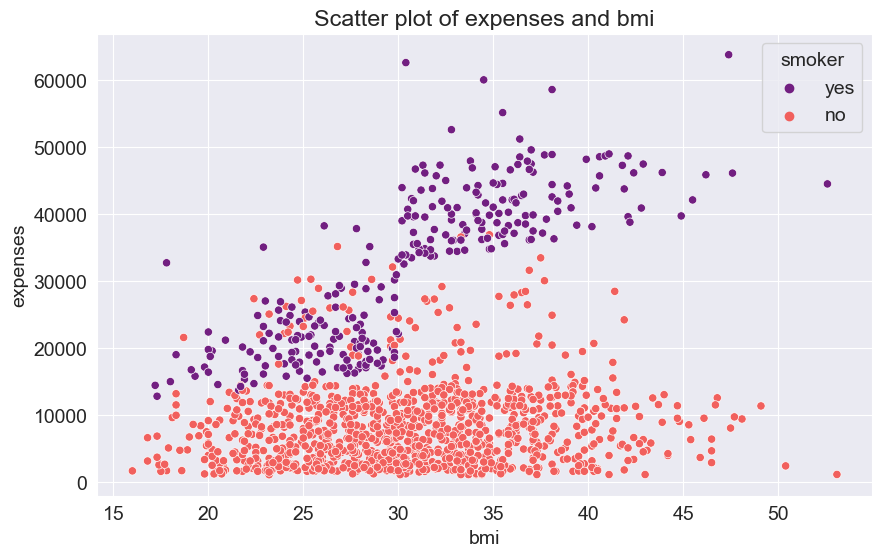

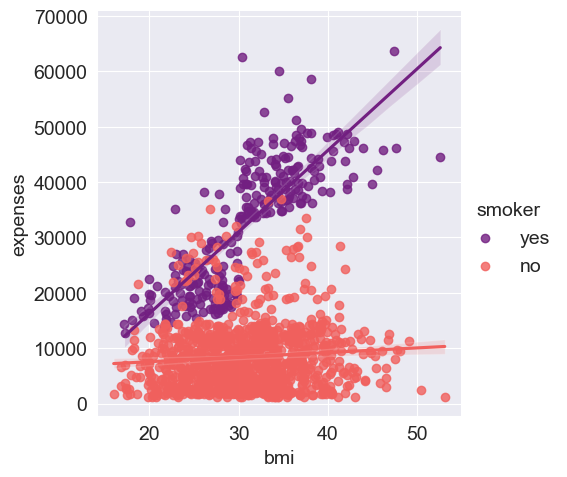

In [53]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'magma')


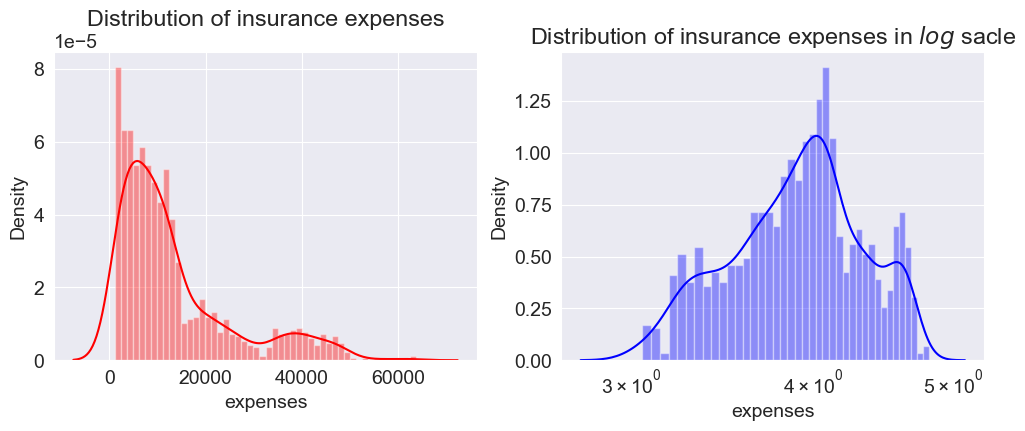

In [54]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');


When we examine the graph on the left, we see that expenses range from 1120 to 63500, and the graph is not evenly distributed. This means that there are more high expense values than low ones. To make the graph easier to work with, we will apply natural log to the graph on the right. This will make the graph more even, like a normal distribution. For future analysis, we will apply log to the target variable charges.

In [55]:
# splitting dependent variable from independent variables
x = df.drop(columns=['expenses'])
y = df['expenses']
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


### Standardization :
Standardization refers to the process of transforming data to have a mean of zero and a standard deviation of one. This is important because many machine learning algorithms assume that the data is normally distributed with these parameters. Standardizing the data ensures that each feature is given equal importance and prevents features with larger values from dominating the model. It also helps the model to converge faster during the training process.

Standardization is a scaling technique which makes the data scale-free by converting the statistical distribution of the data into the below format:

* mean – 0 (zero)
* standard deviation – 1

### One-hot Encoding
One-hot encoding is a technique used in machine learning to convert categorical variables into numerical data by assigning a unique binary code to each category. This creates a new set of numerical variables that can be used in machine learning algorithms. The "region" column have 4 values, so we'll need to use hot encoding and create a new column for each region.

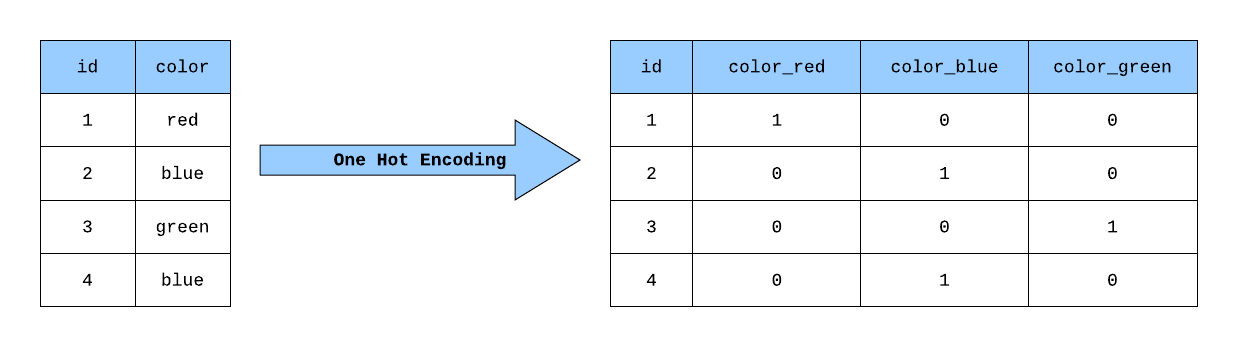!


In [58]:
# Variables for numerical attributes
numeric_features = ['age', 'bmi', 'children']
# Pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Variables for categorical attributes
categorical_features = ['sex', 'smoker','region']
# Pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [61]:
# Splitting the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
# shape of training & test set
print(x_train.shape, y_test.shape)

(1069, 6) (268,)


### Evaluation terms 
### 1. RMSE 
- (Root Mean Square Error) is a metric used in machine learning to evaluate the performance of regression models.
- It measures the difference between the predicted and actual values and represents the standard deviation of these differences.
- To calculate RMSE, the difference between the predicted and actual values is squared, the mean of the squared differences is taken, and then the square root of this value is calculated.
- A lower value indicates better performance, as it means predicted values are closer to actual values, while a higher value indicates poor performance.

### 2. R2 Score
- R2 score (coefficient of determination) is a metric used in machine learning to evaluate the performance of regression models. It measures how well the model fits the data, ranging from 0 to 1, with higher values indicating better performance.
- A negative R2 score indicates the model fits the data worse than a horizontal line.


## Linear Regression

In [64]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(x_train, y_train)

y_pred = linear_reg.predict(x_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :35481471.59594919
The Root Mean Squared Error using Linear Regression :5956.632571843691
The r2_score using Linear Regression :0.8069099329048419


## Decision Tree

In [69]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(x_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(x_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 33857529.57516931
The Root Mean Squared Error using Decision Tree Regressor : 4699.865182886851
The r2_score using Decision Tree Regressor : 0.8469577963535198


## Random Forest

In [70]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
random_forest_reg.fit(x_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(x_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 21189135.143419616
The Root Mean Squared Error using Random Forest Regressor : 4603.165774053724
The r2_score Error using Random Forest Regressor : 0.8531906753421731


In [72]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
2,Random Forest,4603.165774,0.853191
1,Decision Tree,4699.865183,0.846958
0,Linear Regression,5956.632572,0.806910


We can observe that the performance (RMSE & R-sqaured) of Random Forest model is best.

In [74]:
# Saving Random Forest model for model deployment task using pickle library.
pickle.dump(random_forest_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))